# Annova Test to Find Out If Each Campaign has Significant Differences or Not


---
by: Indah Yunita



# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

In [ ]:
data = "/content/drive/MyDrive/Generasi Gigih/Task/Dataset/WA_Marketing-Campaign.csv"
df_campaign = pd .read_csv(data)
df_campaign.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


# EDA

In [ ]:
print("Number of rows:", df_campaign.shape[0])
print("Number of columns:", df_campaign.shape[1])

Number of rows: 548
Number of columns: 7


In [ ]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [ ]:
df_campaign.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [ ]:
df_campaign.duplicated().sum()

0

In [ ]:
df_campaign[df_campaign.duplicated(subset="MarketID")]

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [ ]:
cat_cols = ["MarketID", "MarketSize", "LocationID", "Promotion", "week"]

for col in cat_cols:
  print(f'{col}: ')
  print(df_campaign[col].unique())
  print("\n")

MarketID: 
[ 1  2  3  4  5  6  7  8  9 10]


MarketSize: 
['Medium' 'Small' 'Large']


LocationID: 
[  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920]


Promotion: 
[3 2 1]


week: 
[1 2 3 4]




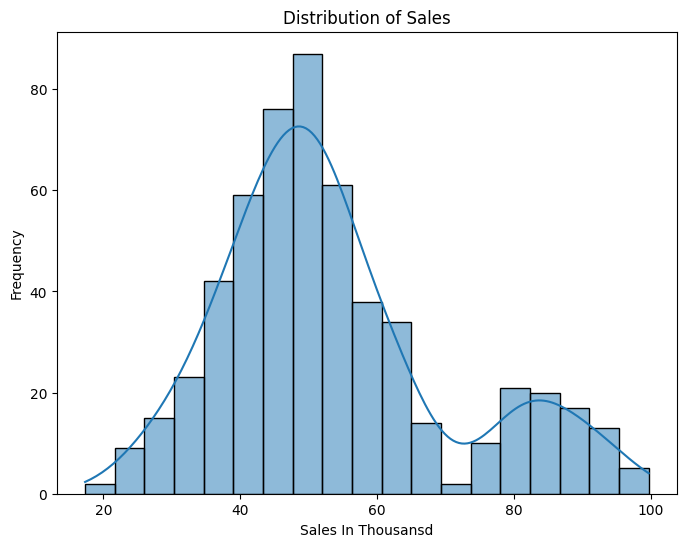

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df_campaign['SalesInThousands'], kde="True")
plt.title("Distribution of Sales")
plt.xlabel("Sales In Thousansd")
plt.ylabel("Frequency")
plt.show()

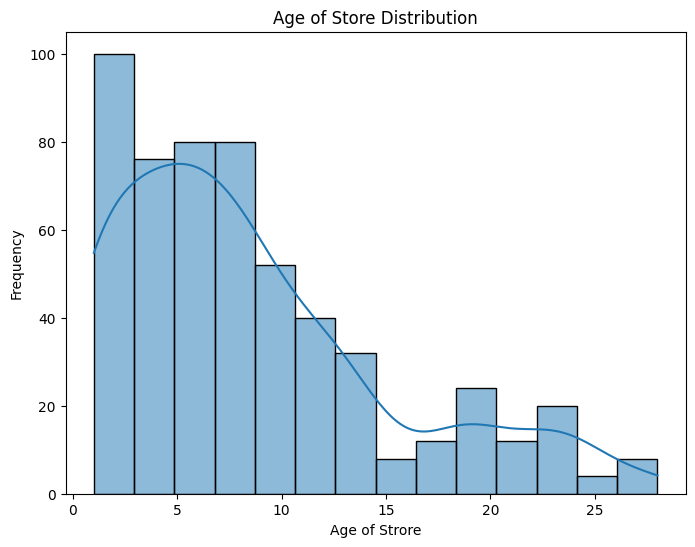

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df_campaign['AgeOfStore'], kde="True")
plt.title("Age of Store Distribution")
plt.xlabel("Age of Strore")
plt.ylabel("Frequency")
plt.show()

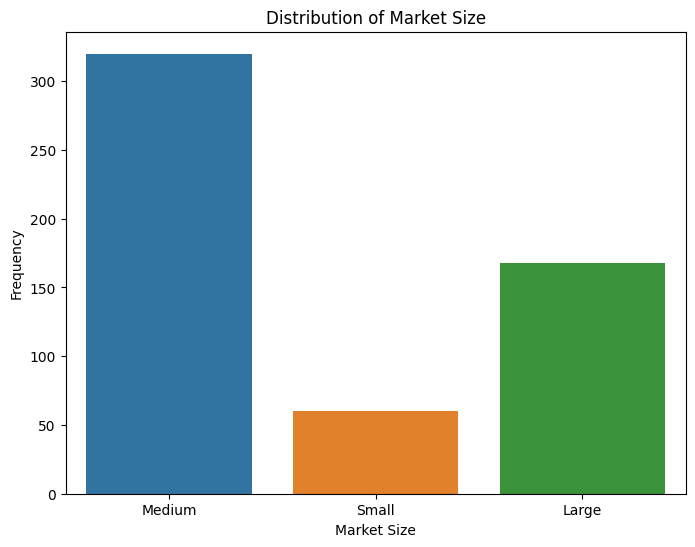

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'MarketSize', data= df_campaign)
plt.title("Distribution of Market Size")
plt.xlabel("Market Size")
plt.ylabel("Frequency")
plt.show()

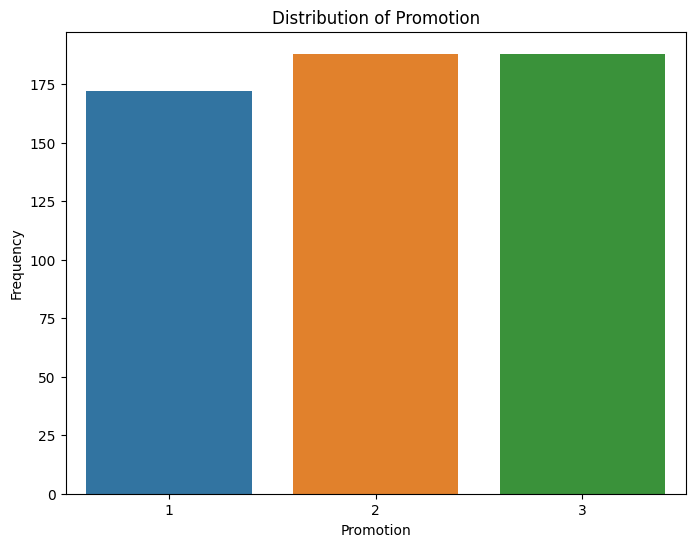

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'Promotion', data= df_campaign)
plt.title("Distribution of Promotion")
plt.xlabel("Promotion")
plt.ylabel("Frequency")
plt.show()

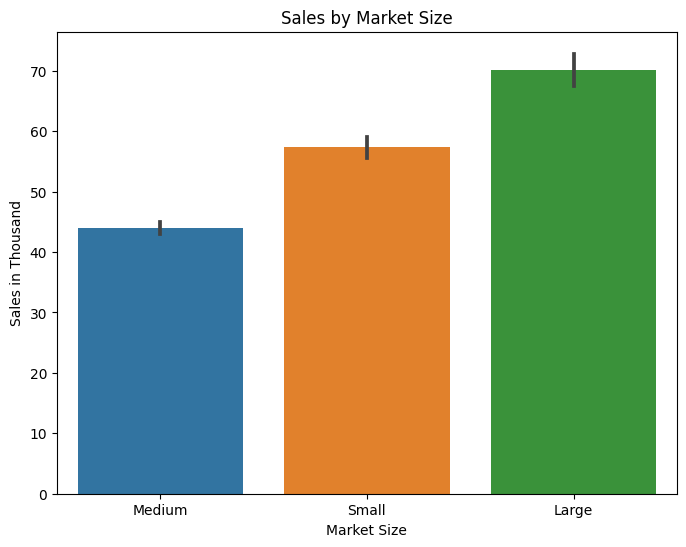

In [ ]:
#sales by market size
plt.figure(figsize=(8,6))
sns.barplot(x="MarketSize", y="SalesInThousands", data=df_campaign)
plt.title("Sales by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Sales in Thousand")
plt.show()

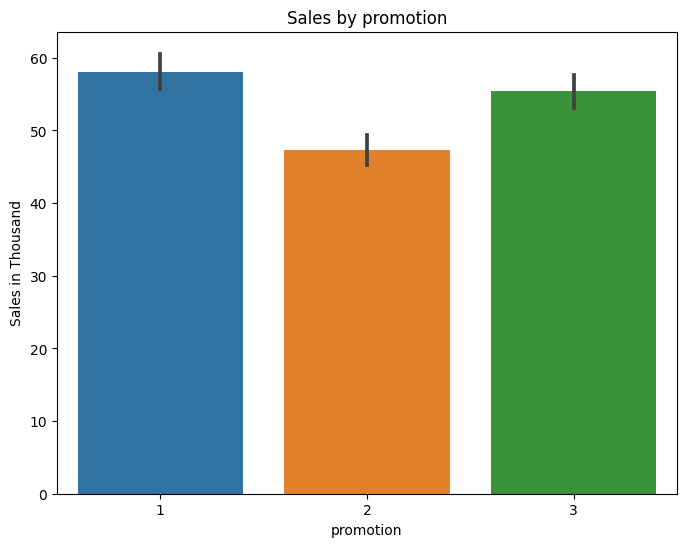

In [ ]:
#sales by promotion
plt.figure(figsize=(8,6))
sns.barplot(x="Promotion", y="SalesInThousands", data=df_campaign)
plt.title("Sales by promotion")
plt.xlabel("promotion")
plt.ylabel("Sales in Thousand")
plt.show()

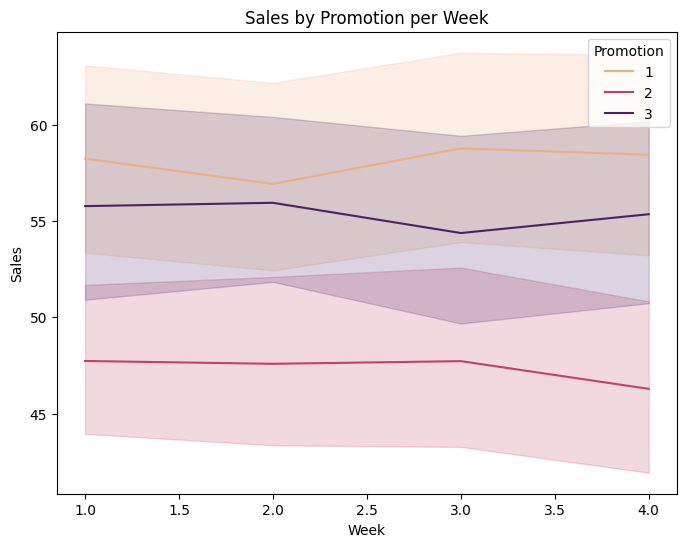

In [ ]:
#Sales by promotion and week
df_campaign["week"]= df_campaign["week"].astype('category')
plt.figure(figsize=(8,6))
sns.lineplot(data=df_campaign, x="week", y="SalesInThousands", hue="Promotion", palette='flare')
plt.title("Sales by Promotion per Week")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.show()

* Sales terbanyak dilihat per pekannya yaitu promotion 1, diikuti promotion 3,
kemudian promotion 2
*promotion 1 dan 2 menurun pada week keempat
*promotion 3 naik pada week keempat


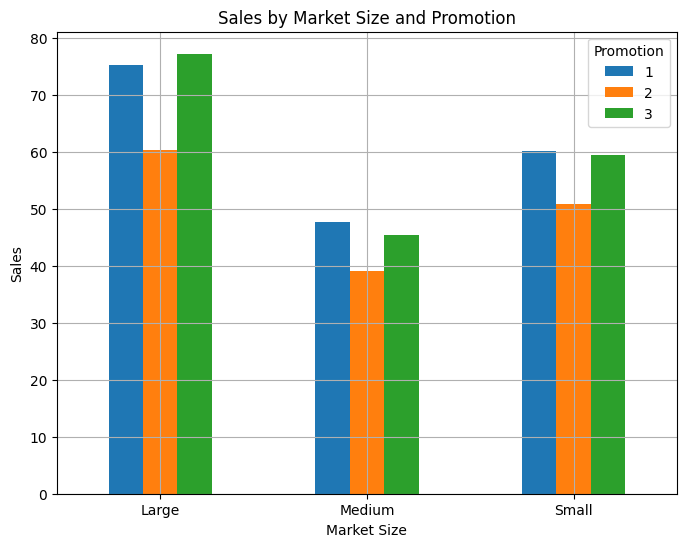

In [ ]:
pivot_table = df_campaign.pivot_table(index='MarketSize', columns='Promotion', values='SalesInThousands', aggfunc='mean')

# Create the bar plot using Matplotlib
ax = pivot_table.plot(kind='bar', figsize=(8, 6))

plt.title("Sales by Market Size and Promotion")
plt.xlabel("Market Size")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.legend(title='Promotion')
plt.grid(True)
plt.show()

# Hypothesis

Business Hypothesis: Every campaign/promotion has difference in sales

Statistical Hypothesis

H0: P1 = P2 = P3

H1 : P1 != P2 != P3

In [ ]:
import scipy.stats as stats

In [ ]:
promotion_1 = df_campaign[df_campaign['Promotion']==1]['SalesInThousands']
promotion_2 = df_campaign[df_campaign['Promotion']==2]['SalesInThousands']
promotion_3 = df_campaign[df_campaign['Promotion']==3]['SalesInThousands']

In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=80c751ccbce74a0db727607b703ccea41d42155af47c5154e64267efa7f3b94f
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# Power Test


---

This test conducted to know minimum sample size

In [ ]:
import pingouin as pg

Partial Eta Square Value

In [ ]:
anova_result = pg.anova(data=df_campaign, dv='SalesInThousands', between='Promotion', detailed=True)
anova_result
# partial_eta_squared = anova_result.iloc[0]['np2']
# print("Eta Squared Value: ", partial_eta_squared)


,Source,SS,DF,MS,F,p-unc,np2
0,Promotion,11449.174291,2,5724.587145,21.953486,6.765849e-10,0.074557
1,Within,142114.105414,545,260.759826,NaN,NaN,NaN


Cohens'f Value

In [ ]:
import math

eta_squared = anova_result['np2'][0]  # partial eta squared (np2)
k = 3  # num of group

cohens_f = math.sqrt(eta_squared / ( 1-eta_squared))
print("Cohen's f:", cohens_f)

Cohen's f: 0.28383666186172984


Power Test Analysis

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.power import FTestAnovaPower

In [ ]:
# Set parameter
effect_size = 0.28 #based on cohens f
alpha = 0.05
power = 0.8

# FTestAnovaPower
power_analysis = FTestAnovaPower()

# Sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power)

print("Minimum Size of Sample:", round(sample_size))

Minimum Size of Sample: 102


We have 548 data, so it's enough to Annova Test

# Annova Test

In [ ]:
#annova test
f_value, p_value = stats.f_oneway(promotion_1,promotion_2,promotion_3)
print("f Value: ", f_value)
print("P Value: ", p_value)

f Value:  21.953485793080677
P Value:  6.765849261408714e-10


In [ ]:
if p_value < alpha :
  print("Reject Null Hypothesis, Campaign/Promotion has significant impact to sales")
else:
  print("Accept Null Hypothesis, Campaign/Promotion has not significant impact to sales")

Reject Null Hypothesis, Campaign/Promotion has significant impact to sales


* Setiap promotion memiliki perbedaan yang signifikan
* Rekomendasi promotion yang dapat digunakan adalah promotion 1 atau promotion 3 karena kedua promotion ini memiliki rata-rata sales yang lebih tinggi dibanding dengan promotion 2
* Berdasarkan analisis dan eksplorasi data, terdapat rekomendasi promotion berdasarkan market size:
    - Large : promotion 3
    - Medium & small: promotion 1

